# Overview of Economic Situation in Azerbaijan
###### Prepared by Murad Isgandarov

![Data Modeling Mistakes](https://assets.techrepublic.com/uploads/2022/10/tr-data-modeling-mistakes-companies-make.jpeg)

### Objective
This task explores selected economic indicators of Azerbaijan using publicly available data from "digital Azerbaijan" website. The aim is to gain a clearer understanding of recent trends and structural patterns in the economy through simple, transparent data visualisation techniques using various visualizatioun libraries.

Rather than focusing on complex modelling, the emphasis is placed on clarity, interpretability, and reproducibility, demonstrating how basic analytical tools can be used to extract meaningful insights from economic data.

### Section 1: Employment dynamics by Economic Activity type

In [29]:
# Libraries
!pip install pywaffle highlight_text pyfonts
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np
import seaborn as sns
from pywaffle import Waffle
from highlight_text import fig_text

In [19]:
df_act=pd.read_csv("/content/iqtisadi-faliyyt-novlri-tsnifat-uzr-mul-halinin-say-dt_ab_014.csv", encoding='latin1')

In [20]:
for i in df_act.columns.tolist()[2:]:
  df_act[i]=np.round(df_act[i]*100/df_act["Economy - total (ths persons)"],2)

Agriculture, forestry and fishing 
Mining and quarrying 
Manufacturing 
Electricity, gas and steam production, distribution and supply 
Water supply; waste treatment and processing 
Construction 
Trade; repair of motor vehicles 
Transport and storage 
Accommodation and food service activities 
Information and communication 
Financial and insurance activities 
Real estate activities 
Professional, scientific and technical activities 
Administrative and support service activities 
Public administration and defence; social security 
Education 
Human health and social work activities 
Arts, entertainment and recreation 
Other service activities 


In [21]:
df_act

,Year,Economy - total (ths persons),"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas and steam production, distribution and supply",Water supply; waste treatment and processing,Construction,Trade; repair of motor vehicles,Transport and storage,...,Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities
0,2024,5029.8,35.43,0.79,5.84,0.59,0.90,8.03,14.22,4.13,...,1.20,0.79,1.71,1.41,1.88,4.54,7.39,3.78,1.32,3.99
1,2023,4963.3,35.81,0.80,5.74,0.59,0.70,7.83,14.25,4.08,...,1.20,0.75,1.71,1.34,1.95,4.64,7.58,3.82,1.32,3.97
2,2022,4901.1,35.77,0.80,5.64,0.57,0.69,7.75,14.33,4.08,...,1.23,0.72,1.75,1.28,1.98,4.79,7.66,3.85,1.33,4.00
3,2021,4831.1,35.87,0.82,5.51,0.56,0.68,7.74,14.39,4.13,...,1.23,0.66,1.76,1.28,1.96,4.90,7.74,3.86,1.33,3.99
4,2020,4721.2,35.93,0.85,5.41,0.60,0.63,7.58,14.45,4.14,...,1.24,0.61,1.79,1.29,1.91,5.04,7.83,3.96,1.34,3.99
5,2019,4785.6,35.95,0.84,5.42,0.64,0.63,7.60,14.61,4.15,...,1.26,0.59,1.83,1.30,1.47,5.07,7.74,3.93,1.39,3.95
6,2018,4879.3,36.26,0.83,5.22,0.56,0.84,7.27,14.47,4.16,...,1.29,0.56,1.86,1.52,1.22,5.77,7.79,3.89,1.67,3.20
7,2017,4822.1,36.35,0.79,5.17,0.57,0.64,7.21,14.64,4.17,...,1.28,0.56,1.84,1.52,1.20,5.89,7.83,3.92,1.67,3.22
8,2016,4759.9,36.34,0.80,5.09,0.57,0.64,7.22,14.70,4.17,...,1.29,0.57,1.85,1.44,1.20,6.00,7.87,3.90,1.63,3.30
9,2015,4671.6,36.36,0.84,4.92,0.58,0.54,7.20,14.85,4.22,...,1.29,0.71,1.92,1.28,1.18,6.15,8.00,3.87,1.49,3.30


In [59]:
df_act_2024 = df_act.iloc[1, 2:].T.reset_index()
df_act_2024.columns = ['Economic activity', 'Percent']
df_act_2024 = df_act_2024.sort_values(by='Percent', ascending=False)[:8]
df_act_2024["Type"] = df_act_2024['Economic activity'].str.split(' ').str[0]
df_act_2024.loc[df_act_2024['Type'] == 'Public', 'Type'] = 'Public sector'
df_act_2024

,Economic activity,Percent,Type
0,"Agriculture, forestry and fishing",35.81,"Agriculture,"
6,Trade; repair of motor vehicles,14.25,Trade;
5,Construction,7.83,Construction
15,Education,7.58,Education
2,Manufacturing,5.74,Manufacturing
14,Public administration and defence; social secu...,4.64,Public sector
7,Transport and storage,4.08,Transport
18,Other service activities,3.97,Other


In [42]:
from pyfonts import load_google_font

In [117]:
df_act_2000 = df_act.iloc[25, 2:].T.reset_index()
df_act_2000.columns = ['Economic activity', 'Percent']
df_act_2000 = df_act_2000.sort_values(by='Percent', ascending=False)[:8]
df_act_2000["Type"] = df_act_2000['Economic activity'].str.split(' ').str[0]
df_act_2000.loc[df_act_2000['Type'] == 'Public', 'Type'] = 'Public sector'
df_act_2000.loc[df_act_2000['Type'] == 'Human', 'Type'] = 'Social work'
df_act_2000

,Economic activity,Percent,Type
0,"Agriculture, forestry and fishing",41.49,"Agriculture,"
6,Trade; repair of motor vehicles,16.04,Trade;
15,Education,8.44,Education
14,Public administration and defence; social secu...,7.03,Public sector
2,Manufacturing,4.88,Manufacturing
16,Human health and social work activities,4.54,Social work
5,Construction,4.18,Construction
7,Transport and storage,3.88,Transport


In [90]:
def build_waffle_plot(df, background_color, active_cells, non_active_cells, year, figsize=(10, 10), fontsize=12):
  font_title = load_google_font("Staatliches")
  font_credit = load_google_font("Raleway", weight="light")
  bold_font_credit = load_google_font("Raleway", weight="bold")

  background_color = background_color
  active_cells_color = active_cells
  non_active_cells_color = non_active_cells

  number_of_bars = len(df)  # one bar per continent

  # Init the whole figure and axes
  fig, axs = plt.subplots(nrows=number_of_bars, ncols=1, figsize=figsize, dpi=300)
  fig.set_facecolor(background_color)


  # Iterate over each bar and create it
  for (i, row), ax in zip(df.iterrows(), axs):
      ax.set_facecolor("white") # Moved this line inside the loop
      share = row["Percent"]
      values = [share, 100 - share]

      Waffle.make_waffle(
          ax=ax,
          rows=2,
          columns=20,
          values=values,
          colors=[active_cells_color, non_active_cells_color],
      )

      text = f"{row['Type']}"
      ax.text(
          x=-0.7,
          y=0.5,
          s=text,
          font=bold_font_credit,
          color="white",
          rotation=90,
          ha="center",
          va="center",
          fontsize=10,
      )
      text = f"{share}%"
      ax.text(
          x=-0.2,
          y=0.5,
          s=text,
          font=font_credit,
          color="white",
          rotation=90,
          ha="center",
          va="center",
          fontsize=fontsize,
      )

  fig_text(
      x=0.05,
      y=0.95,
      s=f"Top 8 Sectors by Economic Activity in Azerbaijan in <{year}>",
      highlight_textprops=[{"color": active_cells_color}],
      color="white",
      fontsize=22,
      font=font_title,
  )
  fig_text(
      x=0.05,
      y=0.05,
      s="<Data> digital Azerbaijan (year 2026) | <Inspired by> Benjamin Nowak",
      font=font_credit,
      color="white",
      fontsize=10,
      highlight_textprops=[{"font": bold_font_credit}] * 2,
  )

  plt.show()

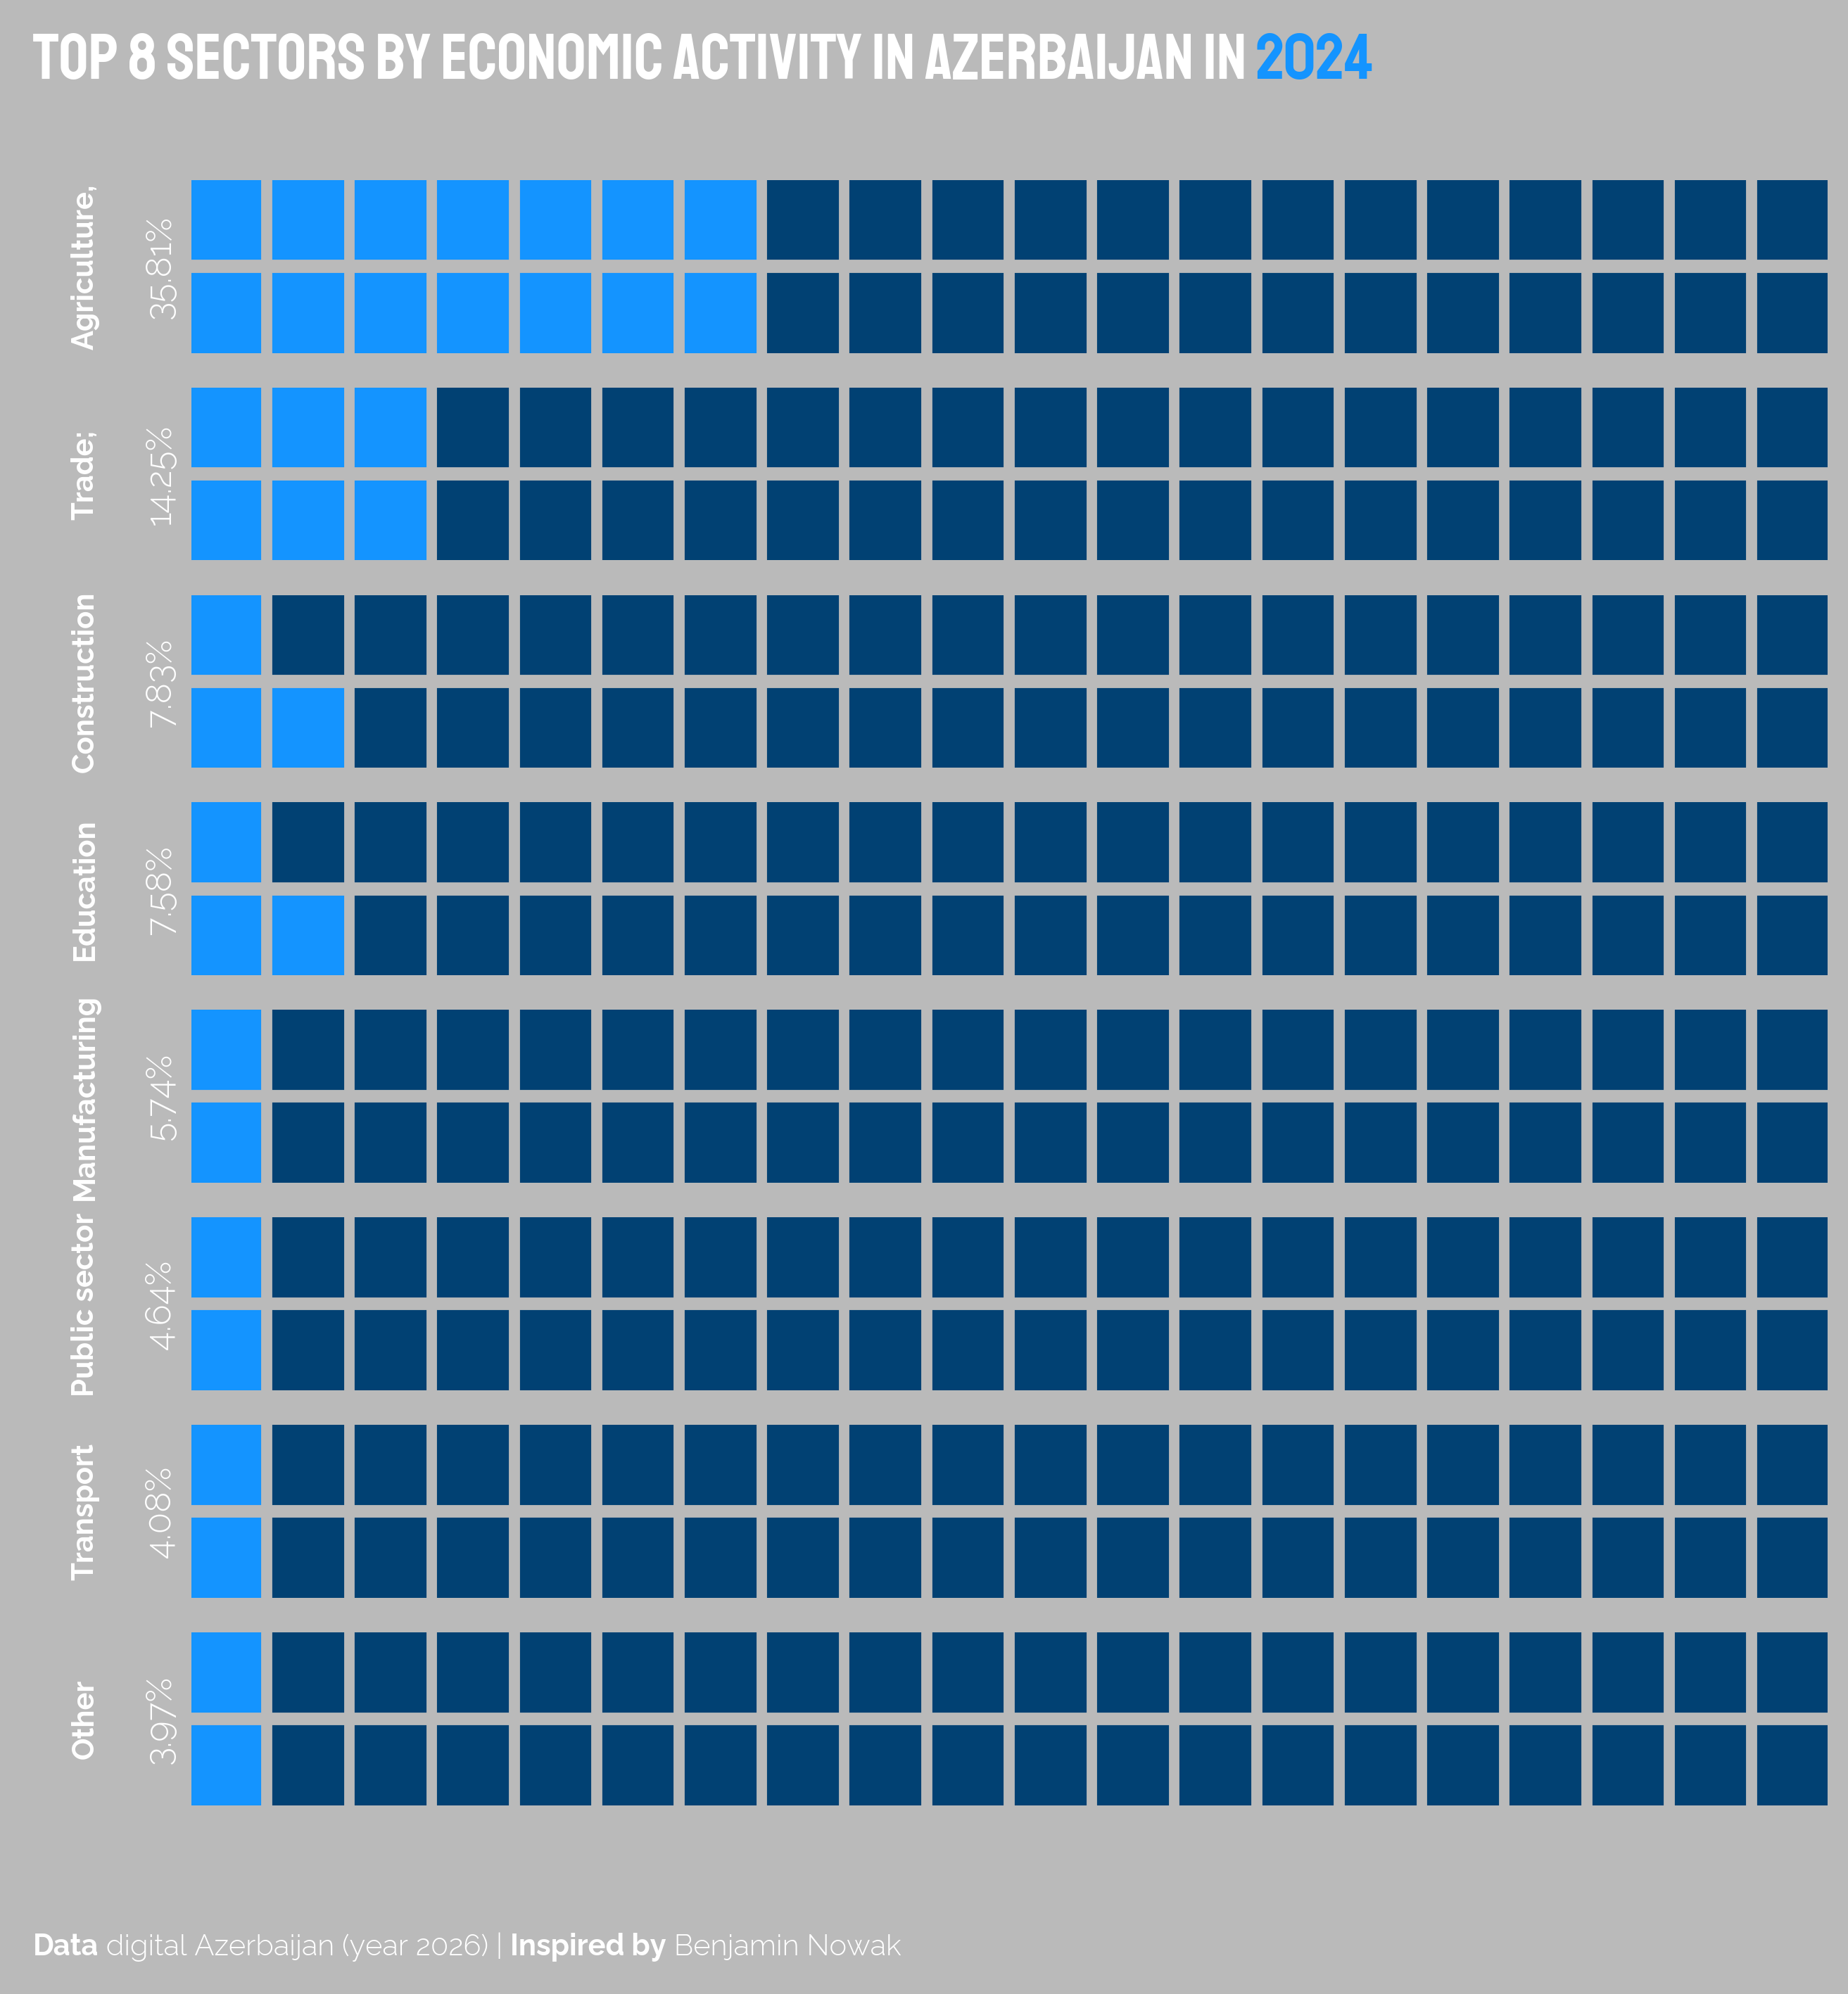

In [91]:
build_waffle_plot(df=df_act_2024, background_color= "#BABABA", active_cells = "#1494FF", non_active_cells="#014173", year=2024)

Agriculture stands out as the dominant sector, accounting for 35.8%, followed by Trade at 14.25%. A middle tier includes Construction (7.83%), Education (7.58%), and Manufacturing (5.74%), while smaller but still significant contributions come from the Public sector (4.64%), Transport (4.08%), and Other activities (3.97%).

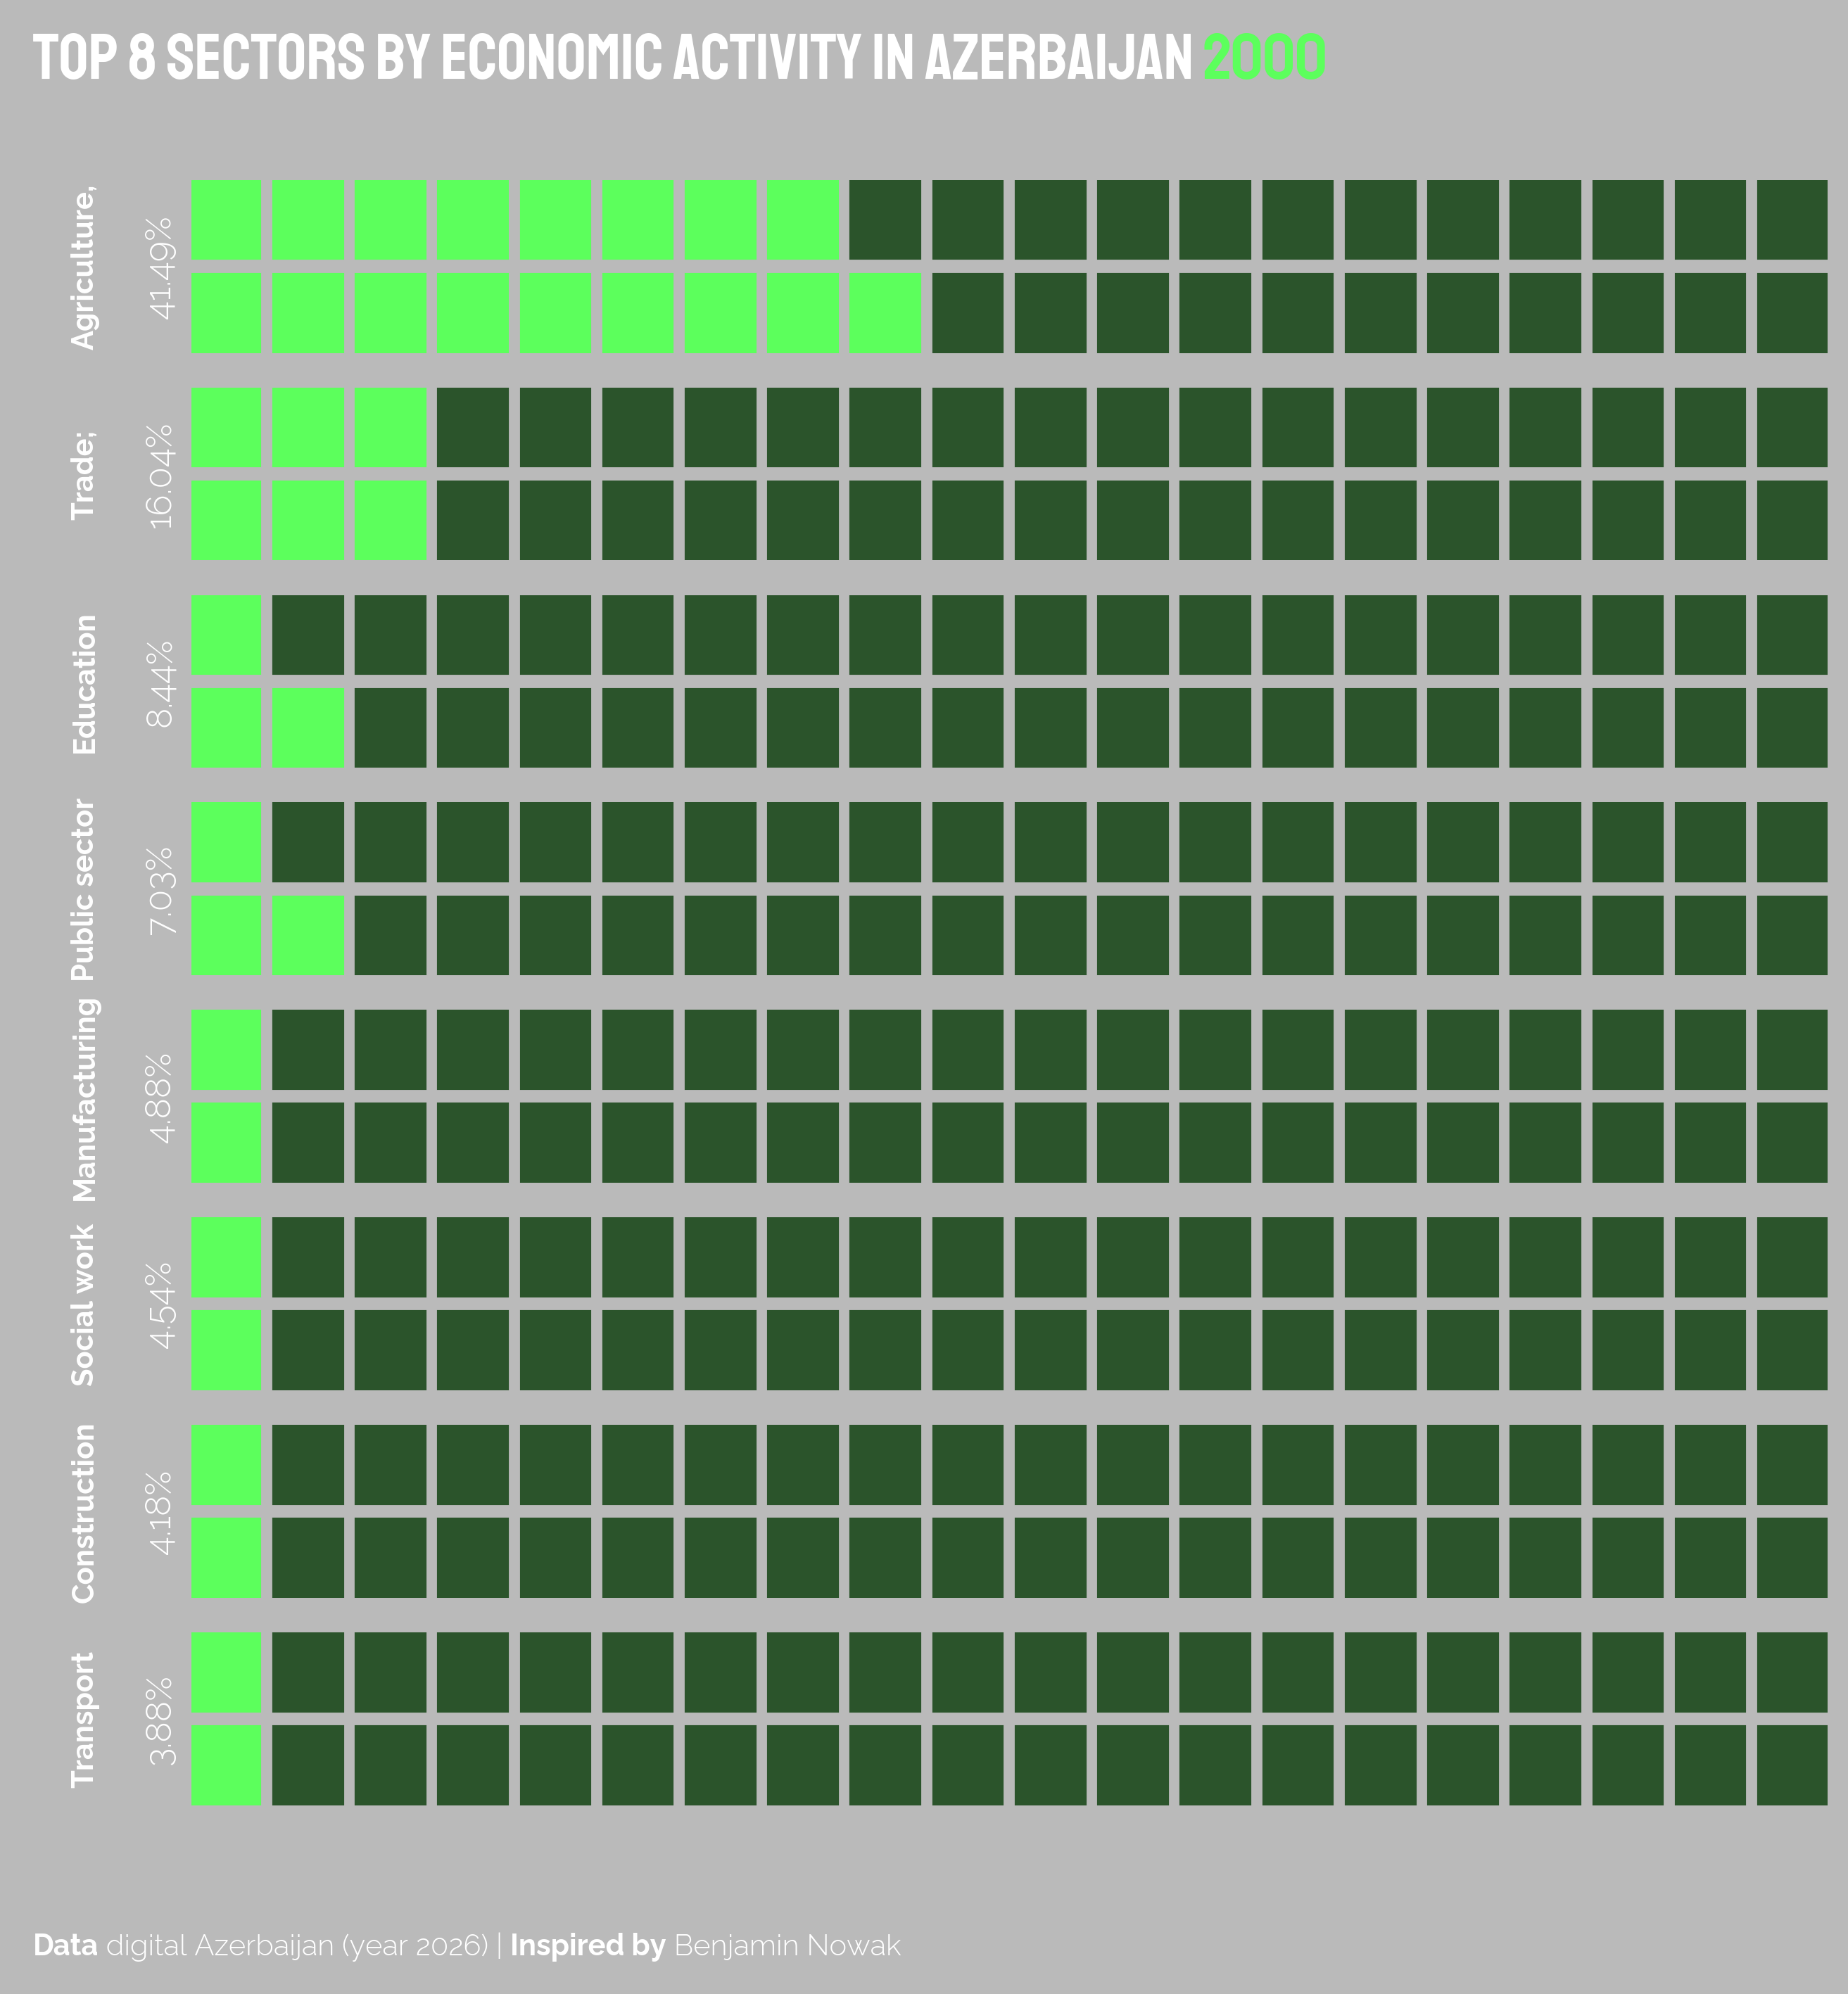

In [88]:
build_waffle_plot(df=df_act_2000, background_color= "#BABABA", active_cells = "#5CFF5C", non_active_cells="#2B542B", year=2000)

Compared to 2000, the structure of Azerbaijan’s economy in 2024 shows a clear shift toward diversification. While agriculture remains the largest sector, its share has declined markedly (from over 41% in 2000 to around 36% in 2024), indicating reduced reliance on a single traditional activity.

Trade remains a key contributor in both years, though its relative importance has slightly decreased. In contrast, sectors such as construction, manufacturing, education, transport, and other services have gained a more balanced and visible presence by 2024. Overall, the comparison highlights Azerbaijan’s gradual transition from an agriculture-dominated economy toward a more mixed and service-oriented structure over the past two decades.

### Monthly Salary Analysis by Economic Activity

In [99]:
df_salary = pd.read_csv("/content/iqtisadi-faliyyt-novlri-tsnifat-uzr-orta-aylq-nominal-mkhaqq-dt_ab_016.csv")
df_salary.drop(columns=["Unnamed: 1"], inplace=True)

In [100]:
df_salary

,Year,Economy - total,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas and steam production, distribution and supply",Water supply; waste treatment and processing,Construction,Trade; repair of motor vehicles,Transport and storage,...,Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities
0,2024,1009.4,611.7,3561.4,905.3,1097.1,685.9,1087.1,691.7,1392.5,...,1672.1,2687.4,1073.9,1711.2,621.9,1419.3,754.2,847.3,747.1,1301.4
1,2023,933.9,558.7,3350.6,840.8,965.5,711.5,1060.4,632.1,1278.5,...,1509.9,2327.2,910.9,1573.2,568.4,1357.2,712.6,804.4,719.5,1102.8
2,2022,840.0,514.8,3240.3,765.6,897.2,647.3,1005.5,573.3,1124.3,...,1342.4,2066.8,789.0,1407.6,486.8,1213.3,630.2,695.0,622.2,931.1
3,2021,732.1,456.9,3088.3,685.2,770.0,549.6,887.9,536.8,953.0,...,1155.4,1937.6,660.0,1208.9,431.6,985.3,526.1,568.2,535.7,758.5
4,2020,707.7,433.5,3278.6,644.4,698.3,558.3,790.6,521.4,886.0,...,1082.6,1726.4,610.5,1188.4,426.2,957.2,515.7,524.7,529.7,678.8
5,2019,635.1,371.4,3055.6,632.3,638.9,468.9,737.3,480.3,855.8,...,1005.3,1607.3,558.2,1180.3,386.1,799.9,438.9,352.4,423.8,631.8
6,2018,544.6,281.1,2964.2,554.1,583.3,304.6,698.7,390.3,806.9,...,881.3,1459.3,422.5,1054.7,548.3,596.0,365.3,239.4,296.0,631.8
7,2017,528.5,261.5,3071.9,554.0,547.8,324.6,783.3,385.6,733.9,...,870.6,1387.7,354.6,1032.7,547.8,534.5,322.2,222.5,268.4,662.6
8,2016,499.8,253.8,2807.2,542.9,504.7,321.4,812.9,382.3,649.3,...,782.0,1229.2,337.0,886.5,543.6,510.6,307.0,214.8,258.9,473.4
9,2015,466.9,245.8,2171.1,527.9,513.2,333.3,677.7,378.1,575.8,...,747.2,1210.9,308.2,752.4,542.6,494.7,301.1,204.2,252.7,441.9


In [146]:
df_salary_2024 = df_salary.iloc[1,2:].T.reset_index()
df_salary_2024.columns = ["Type", "Salary"]
df_salary_2024["Type"] = df_salary_2024['Type'].str.split(",").str[0]
df_salary_2024.iloc[14, 0] = "Public administration"
df_salary_2024.iloc[4, 0] = "Water supply"
df_salary_2024.iloc[16, 0] = "Social work"
df_salary_2024

,Type,Salary
0,Agriculture,558.7
1,Mining and quarrying,3350.6
2,Manufacturing,840.8
3,Electricity,965.5
4,Water supply,711.5
5,Construction,1060.4
6,Trade; repair of motor vehicles,632.1
7,Transport and storage,1278.5
8,Accommodation and food service activities,723.9
9,Information and communication,1509.9


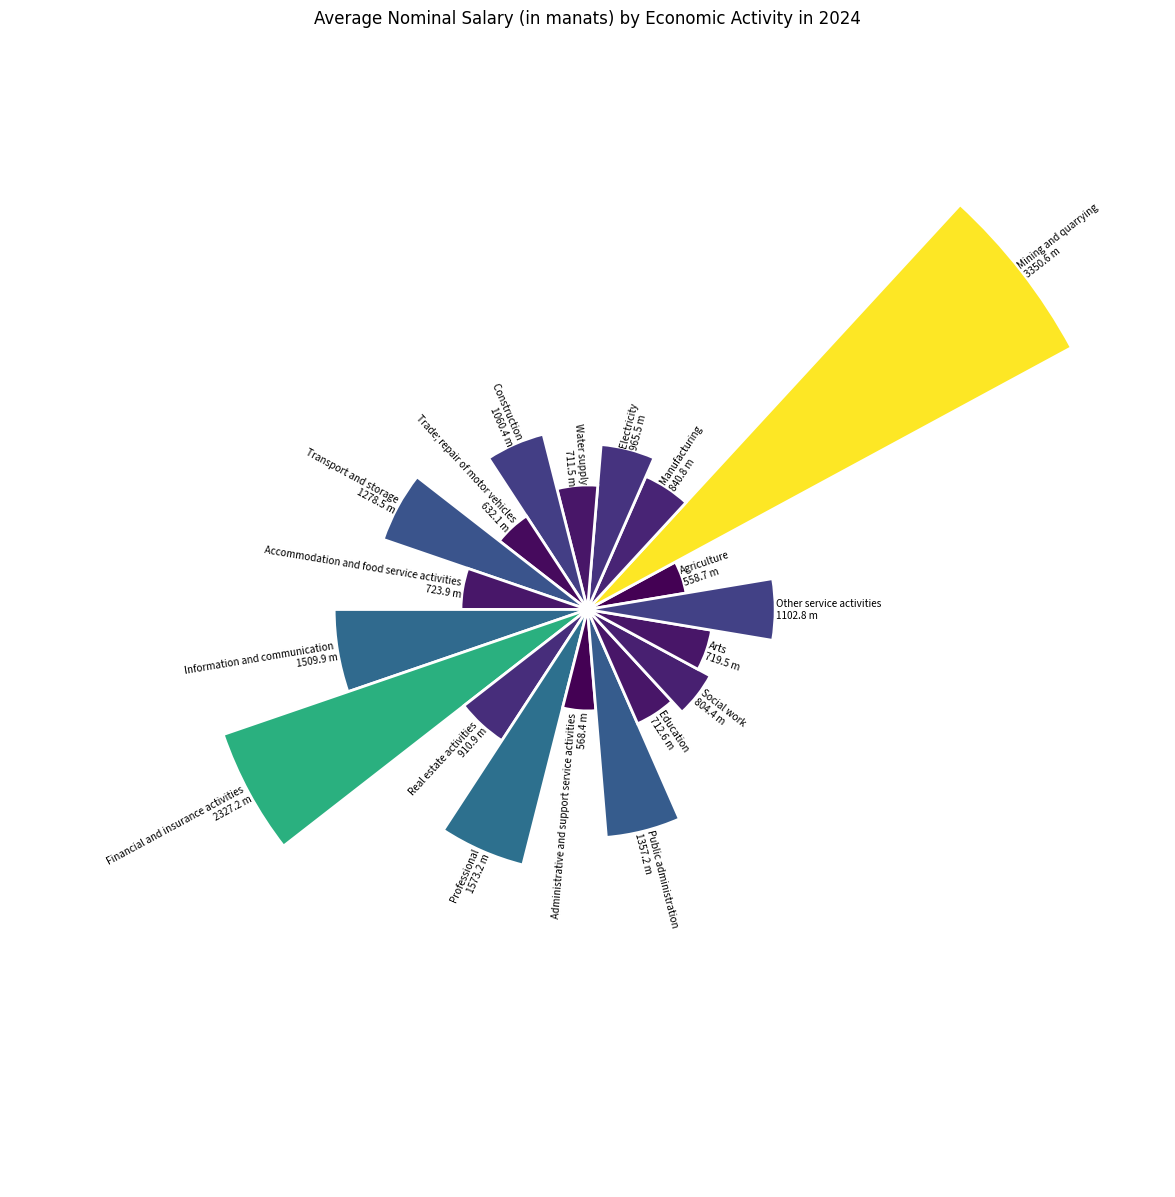

In [155]:
df = df_salary_2024.copy()

plt.figure(figsize=(20,15))
ax = plt.subplot(111, polar=True)
plt.axis('off')

upperLimit = 100
lowerLimit = 30
labelPadding = 4

max_salary = df['Salary'].max()

slope = (max_salary - lowerLimit) / max_salary
heights = slope * df.Salary + lowerLimit

width = 2*np.pi / len(df.index)

indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]

cmap = cm.viridis
norm = plt.Normalize(vmin=df['Salary'].min(), vmax=df['Salary'].max())
colors = [cmap(norm(value)) for value in df['Salary']]
label_font = load_google_font("Source Sans 3")


bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color=colors,
)


for bar, angle, height, label, salary_value in zip(bars, angles, heights, df["Type"], df["Salary"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=f"{label}\n{salary_value:.1f} m",
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor",
        color="black",
        fontsize=8,
        font=label_font
    )

plt.title("Average Nominal Salary (in manats) by Economic Activity in 2024")

plt.show()

The chart illustrates average nominal monthly salaries by economic activity in Azerbaijan in 2024. A clear wage gap is visible across sectors. Mining and quarrying stands out with the highest average salary by a wide margin, reflecting the capital-intensive and high-value nature of the sector.

Relatively high wages are also observed in financial and insurance activities, information and communication, and professional services, while sectors such as agriculture, education, arts, and social work remain at the lower end of the salary distribution. Overall, the visualization highlights significant disparities in earnings across economic activities, closely linked to productivity levels and sectoral specialization.

### Average Salary dynamics compared to the size of IT sector in Azerbaijan

In [156]:
df_it=pd.read_csv("/content/ikt-sektorunda-calan-icilrin-siyah-say-dt_cc_006.csv")

In [165]:
df_salary_avg = df_salary.iloc[:,:2]
df_salary_avg


,Year,Economy - total
0,2024,1009.4
1,2023,933.9
2,2022,840.0
3,2021,732.1
4,2020,707.7
5,2019,635.1
6,2018,544.6
7,2017,528.5
8,2016,499.8
9,2015,466.9


In [177]:
df_merge=pd.merge(df_salary_avg, df_it, on="Year")
df_merge.columns = ["Year", "Salary", "IT"]

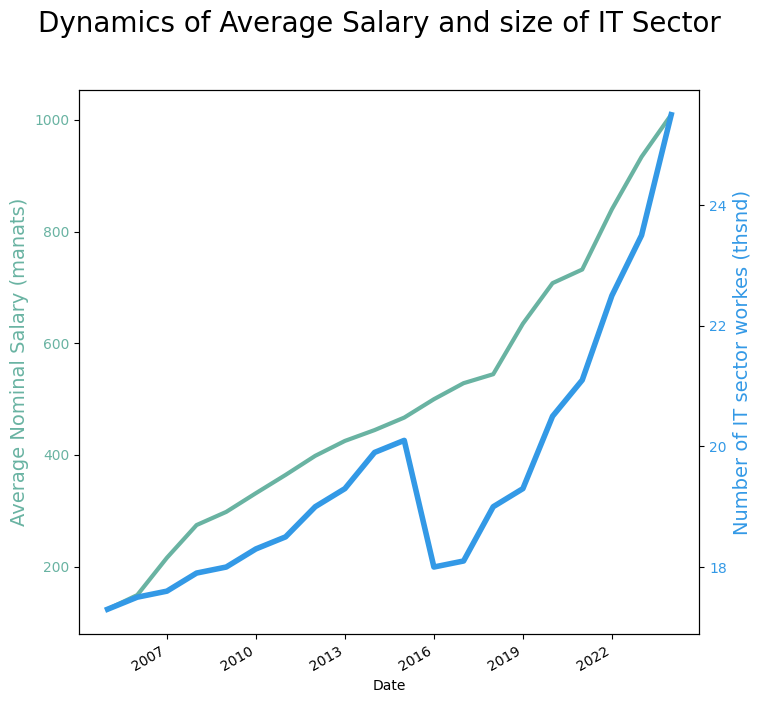

In [176]:
COLOR_1 = "#69b3a2"
COLOR_2 = "#3399e6"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(df_merge["Year"], df_merge['Salary'], color=COLOR_1, lw=3)
ax2.plot(df_merge["Year"], df_merge['IT'], color=COLOR_2, lw=4) # Changed df["Salary"] to df_merge["Salary"]

ax1.set_xlabel("Date")
ax1.set_ylabel("Average Nominal Salary (manats)", color=COLOR_1, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_1)

ax2.set_ylabel("Number of IT sector workes (thsnd)", color=COLOR_2, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_2)

ax1.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

fig.suptitle("Dynamics of Average Salary and size of IT Sector", fontsize=20)
fig.autofmt_xdate()

plt.show()

The chart illustrates the long-term growth of the IT sector in Azerbaijan, showing both average nominal salaries and the number of employees over time. Overall, a strong upward trend is visible in both indicators, suggesting steady expansion of the sector.

Average salaries increase almost continuously, with especially rapid growth after the late 2010s, reflecting rising demand for skilled IT professionals. The size of the workforce also grows over time, despite a brief dip around the mid-2010s, after which employment resumes a strong upward trajectory.

Taken together, the trends indicate that the IT sector has evolved into a higher-paying and increasingly significant part of the economy, combining rising wages with sustained job creation